<a href="https://colab.research.google.com/github/fabiobaroliveira/gerador_base_de_dados/blob/main/vendas_veiculos_seminovos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Necessário instalar biblioteca Faker
! pip install faker

In [ ]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis
marcas_modelos = {
    "Fiat" : [ "Mobi","Argo", "Cronos", "500e", "Pulse", "Fastback", "Strada", "Toro", "Fiorino"],
    "Volskwagen" : [ "Up", "Gol", "Voyage", "Saveiro", "Polo", "Virtus", "Nivus", "T-Cross", "Amarok"],
    "Chevrolet" : [ "Onix", "Prisma", "Cruze", "Tracker", "S-10", "TrailBlazer"],
    "Hyundai" : [ "HB20", "HB20S", "Creta", "Tucson"],
    "Honda" : [ "Civic", "HR-V", "City", "Fit", "CR-V"],
    "Toyota" : [ "Etios","Yaris","Corolla", "Camry", "Corolla Cross", "Hilux"],
    "Ford" : [ "Ka", "Ka Sedan", "Ecosport", "Ranger", "Focus", "Territory"],
    "Peugeot" : [ "208" , "308", "2008", "3008", "Partner"],
    "Citroen" : [ "C3", "Aircross", "C4", "C4 Grand Picasso", "Basalt"],
    "Jeep" : [ "Compass", "Renegade", "Wrangler", "Cherokee"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]
cores = ["Preto", "Branco", "Prata", "Vermelho", "Azul", "Verde", "Cinza"]
sexo_opcoes = ["Masculino", "Feminino"]

# Função para gerar pesos aleatórios
def gerar_pesos_aleatorios(n):
    pesos = [random.randint(1, 100) for _ in range(n)]  # Gera n pesos aleatórios
    total = sum(pesos)  # Calcula a soma dos pesos
    pesos = [round((p / total) * 100, 2) for p in pesos]  # Normaliza para somar 100
    return pesos

# Gerando pesos aleatórios para marcas
marcas = list(marcas_modelos.keys())
pesos_marcas = gerar_pesos_aleatorios(len(marcas))

# Gerando pesos aleatórios para formas de pagamento
pesos_formas_pagamento = gerar_pesos_aleatorios(len(formas_pagamento))

# Gerando pesos aleatórios para cores
pesos_cores = gerar_pesos_aleatorios(len(cores))

# Gerando pesos aleatórios para sexo
pesos_sexo = gerar_pesos_aleatorios(len(sexo_opcoes))

# Gerando os dados fictícios
dados = []

for i in range(1, 10951):
    sexo = random.choices(sexo_opcoes, weights=pesos_sexo, k=1)[0]
    nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
    sobrenome = fake.last_name()
    nome_completo = f"{nome} {sobrenome}"
    idade = random.randint(18, 70)
    cpf = fake.cpf()
    email = fake.email()
    telefone = fake.phone_number()
    cidade = fake.city()
    estado = fake.state_abbr()

    # Escolha da marca com base nos pesos aleatórios
    marca = random.choices(marcas, weights=pesos_marcas, k=1)[0]
    modelo = random.choice(marcas_modelos[marca])

    ano_fabricacao = random.randint(2013, 2023)
    cor = random.choices(cores, weights=pesos_cores, k=1)[0]
    valor_venda = round(random.uniform(30000, 250000), 2)
    data_venda = fake.date_between(start_date="-8y", end_date="today")
    forma_pagamento = random.choices(formas_pagamento, weights=pesos_formas_pagamento, k=1)[0]

    dados.append([
        i, nome_completo, idade, cpf, sexo, email, telefone, cidade, estado,
        marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento
    ])

# Criando o DataFrame
colunas = ["ID", "Nome Completo", "Idade", "CPF", "Sexo", "E-mail",
           "Telefone", "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao",
           "Cor", "Valor_venda", "Data_venda", "Forma_pagamento"]

df_vendas = pd.DataFrame(dados, columns=colunas)

# Exibindo as primeiras linhas do DataFrame
df_vendas.head()

,ID,Nome Completo,Idade,CPF,Sexo,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Milena Vasconcelos,42,532.480.716-80,Feminino,cnovaes@example.com,(041) 9877-0414,Guerra de Silva,MG,Fiat,Pulse,2021,Azul,52236.56,2019-09-18,À vista
1,2,Hellena Siqueira,32,340.872.195-50,Feminino,allana46@example.com,0800 757 1465,Costa,MG,Toyota,Yaris,2019,Vermelho,210041.16,2019-01-01,À vista
2,3,Maria Flor Freitas,47,743.690.258-00,Feminino,lorenzoborges@example.net,+55 (071) 4629-6822,Barros,PE,Ford,Ka,2018,Vermelho,161996.76,2023-01-22,À vista
3,4,Carlos Eduardo Carvalho,45,728.514.639-00,Masculino,viniciusaraujo@example.com,+55 (061) 3250 9446,Silva da Serra,PI,Ford,Ka Sedan,2020,Cinza,123873.27,2021-03-13,À vista
4,5,Sarah Alves,51,357.609.841-01,Feminino,vicentebarros@example.net,+55 71 5825 0596,Albuquerque,MT,Ford,Ka Sedan,2018,Azul,103761.76,2023-08-05,À vista


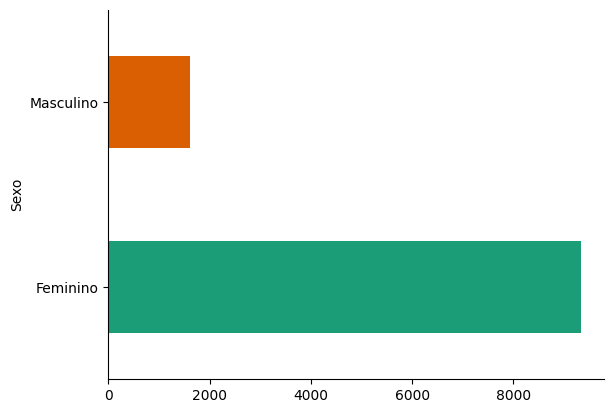

In [ ]:
# @title Gráfico para Vizualização de Divisão por Sexo

from matplotlib import pyplot as plt
import seaborn as sns

df_vendas.groupby("Sexo").size().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2"))

plt.gca().spines[["top", "right",]].set_visible(False)

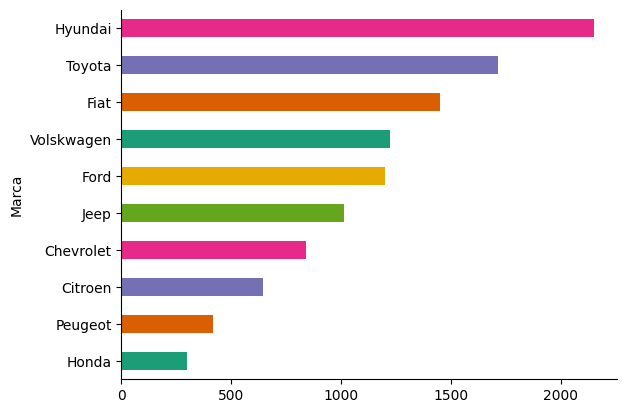

In [ ]:
# @title Gráfico para Vizualização de Divisão de Vendas por Marca

from matplotlib import pyplot as plt
import seaborn as sns

# Coloca em ordem crescente
(df_vendas.groupby("Marca").size().sort_values().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2")))

# Remove bordas desnecessárias
plt.gca().spines[['top', 'right']].set_visible(False)